In [50]:
import pandas as pd
import numpy as np


#processed XLS file
read_file= pd.DataFrame(pd.read_excel("S1Table.XLSX"))
#print(read_file)



# excel file converted into csv file
read_file.to_csv ("dataset.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("dataset.csv"))
  
print(df)#to check



   Status   Age       Site  M132T37p  M312T36p   M357T30p  M114T37p  \
0     DMD   8.0  Australia -5.900795 -6.692130  -8.181688 -8.241714   
1     DMD   4.0    Calgary -7.681591 -6.363260  -7.809234 -9.517703   
2     DMD   4.3    Calgary -5.763479 -6.497395  -7.586421 -8.529271   
3     DMD   4.3    Calgary -5.231625 -6.175428  -7.640971 -8.139534   
4     DMD   5.0    Calgary -5.649194 -7.098781  -8.144606 -8.515200   
..    ...   ...        ...       ...       ...        ...       ...   
68    DMD  18.7   UC Davis -9.449776 -6.770309 -10.482305 -8.162869   
69    DMD  19.9   UC Davis -5.956768 -6.484230 -10.129793 -8.860700   
70    DMD  20.6   UC Davis -5.727256 -5.979051  -9.159941 -7.619924   
71    DMD  26.6   UC Davis -5.938373 -6.706897 -10.915660 -8.754281   
72    DMD  27.2   UC Davis -5.652249 -6.513787 -10.704182 -8.853743   

    M604T163_1p  M176T36p  M604T163_2p  ...  M526T365n  M431T32n  M431T329n  \
0     -4.138729 -6.288298    -4.966778  ...  -4.517056 -4.497986  -3

In [51]:
#columns for metabolite intesnisties seperated to perform the principal componenet analysis on the data

pca_data = df.iloc[:,3:-1]
print(pca_data.shape)

#selecting the number of componenets 
number_components = min(73,2203)
print(number_components)

(73, 2203)
73


In [52]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


#  calculating principle components
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(73))])
output = pipeline.fit_transform(pca_data)#fitting the data 

ans = np.array(pipeline['pca'].explained_variance_ratio_)
np.set_printoptions(suppress=True)
print('Variance Explained: ',ans)


scores_df = pd.DataFrame(output)#storing the PC values as dataframe
print(scores_df)

Variance Explained:  [0.23312869 0.05979062 0.04243217 0.04048109 0.02640116 0.02569079
 0.02255474 0.02224684 0.01912381 0.01747994 0.01694753 0.01546751
 0.01503148 0.01437842 0.01397801 0.01222271 0.01217483 0.0116529
 0.01143374 0.01111673 0.01073416 0.01036017 0.01005832 0.0099206
 0.0098188  0.00960117 0.00920712 0.00898899 0.00881433 0.00855261
 0.00833021 0.00818054 0.0080761  0.00781775 0.00776094 0.00765248
 0.00760681 0.00739223 0.00734717 0.00723688 0.00720473 0.00713204
 0.00702266 0.00688166 0.00675516 0.00663144 0.00657413 0.0064478
 0.00640326 0.00629022 0.00616811 0.00611575 0.00604848 0.00590102
 0.00580416 0.00571832 0.005696   0.00561078 0.00551628 0.00547199
 0.00533964 0.00521229 0.00509833 0.00498872 0.00493006 0.00491119
 0.00472077 0.00461618 0.00453909 0.00447756 0.00432045 0.00426063
 0.        ]
           0          1          2          3          4          5   \
0   -5.019577   1.741621   1.736930  -8.697915  12.890840  -4.678301   
1    5.087727  -4.192

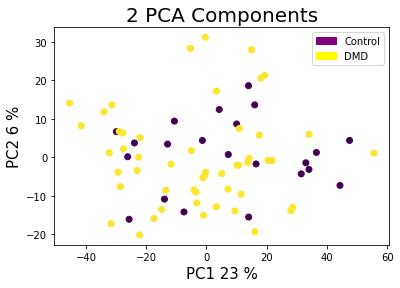

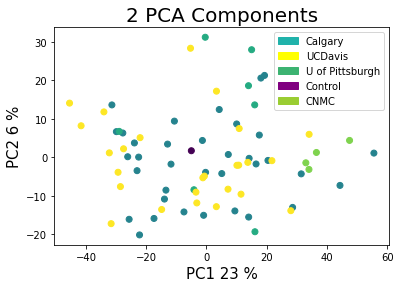

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# for plotting principal component fig1
#creating seperate dataframes to join into one big dataframe to plot according to labels
#according to age group; labels = age
label1_col1 = df.iloc[:,1]
label1_col2 = scores_df.iloc[:,0] 
label1_col3 = scores_df.iloc[:,1]

frame1 = [label1_col1,label1_col2,label1_col3]
result1 = pd.concat(frame1,axis=1, join='outer')
#print(result1)


status_data = df.iloc[:,0]
#print(status_data)
site_data = df.iloc[:,2]


# PLOT 'STATUS' GRAPH WITH PC values
 
plt.subplot(1,1,1)  
plt.xlabel('PC1 %d %%' % round(ans[0]/sum(ans)*100),fontsize = 15)  
plt.ylabel('PC2 %d %%' % round(ans[1]/sum(ans)*100),fontsize = 15)  
plt.title('2 PCA Components',fontsize=20) 

# Label to color dict (automatic)
label_color_dict = {label:idx for idx,label in enumerate(status_data)}
#print("label dict: ", label_color_dict)
# Color vector creation
cvec = [label_color_dict[label] for label in status_data]

purple_patch = mpatches.Patch(color='purple', label='Control')
yellow_patch = mpatches.Patch(color='yellow', label='DMD')
plt.scatter(scores_df.iloc[:,0],scores_df.iloc[:,1], c=cvec)
plt.legend(handles=[purple_patch, yellow_patch])
plt.show()


# PLOT 'SITE' GRAPH WITH PC values

plt.xlabel('PC1 %d %%' % round(ans[0]/sum(ans)*100),fontsize = 15)  
plt.ylabel('PC2 %d %%' % round(ans[1]/sum(ans)*100),fontsize = 15)  
plt.title('2 PCA Components',fontsize=20) 
#plot site wise
label_color_dict = {label:idx for idx,label in enumerate(site_data)}

label_color_dict['Australia'] = 5
label_color_dict['CNMC'] += 20
#print("label dict site: ", label_color_dict)
# Color vector creation
cvec = [label_color_dict[label] for label in site_data]

plt.scatter(scores_df.iloc[:,0],scores_df.iloc[:,1], c=cvec)
green_patch = mpatches.Patch(color='lightseagreen', label='Calgary')
yellow_patch = mpatches.Patch(color='yellow', label='UCDavis')
light_green_patch = mpatches.Patch(color='mediumseagreen', label='U of Pittsburgh')
purple_patch = mpatches.Patch(color='purple', label='Control')
yellow_green_patch = mpatches.Patch(color='yellowgreen', label='CNMC')
plt.legend(handles=[green_patch, yellow_patch, light_green_patch, purple_patch, yellow_green_patch])
plt.show()

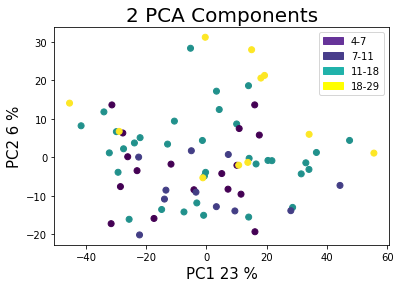

In [62]:
# Plot 'Age' wise with PC values

age_data = df.iloc[:,1]

age_dict = {}
age_range = ["4-7", "7-11", "11-18", "18-29"]
for value in age_range:
	age_dict[value] = []

for idx, age in enumerate(age_data):
	if age >=4 and age < 7:
		age_dict["4-7"].append(idx)
	elif age >= 7 and age < 11:
		age_dict["7-11"].append(idx)
	elif age >= 11 and age < 18:
		age_dict["11-18"].append(idx)
	elif age >= 18 and age < 29:
		age_dict["18-29"].append(idx)



plt.xlabel('PC1 %d %%' % round(ans[0]/sum(ans)*100),fontsize = 15)  
plt.ylabel('PC2 %d %%' % round(ans[1]/sum(ans)*100),fontsize = 15)  
plt.title('2 PCA Components',fontsize=20) 
cvec = [None]*73
for key in age_dict:
	all_index = age_dict[key]
	value_color = key.split("-")[1]
	
	for index in all_index:
		cvec[index] = int(value_color)

#print("check cvec")
#print(cvec)
# cvec = [age_dict[label] for label in age_data]

plt.scatter(scores_df.iloc[:,0],scores_df.iloc[:,1], c=cvec)
green_patch = mpatches.Patch(color='darkslateblue', label='7-11')
yellow_patch = mpatches.Patch(color='yellow', label='18-29')
light_green_patch = mpatches.Patch(color='lightseagreen', label='11-18')
purple_patch = mpatches.Patch(color='rebeccapurple', label='4-7')
plt.legend(handles=[purple_patch, green_patch, light_green_patch, yellow_patch])
plt.show()


In [73]:
#Association of PC1 with different variables
#PC1 is associated with DMD, age, their interaction, or study site
#AIC calculation - .aic



#data modified ,Status : DMD - 1,Control - 0 for p value calculations
read_file2= pd.DataFrame(pd.read_excel("REG_set.xlsx"))

read_file2.to_csv ("dataset2.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
df2 = pd.DataFrame(pd.read_csv("dataset2.csv"))
PC1_df_data = [df2.iloc[:,0] ,df.iloc[:,1] ,df.iloc[:,2] ,scores_df.iloc[:,0]]

PC1_df = pd.concat(PC1_df_data, axis=1, keys=headers)

#print(PC1_df)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats


#model1 = DMD status, Age, (DMD status) x Age, Site
#model2 = DMD status, Age, (DMD status) x Age
#model3 = DMD status, Age, Site
#model4 = DMD status, Age
#model5 = Age, Site
#model6 = DMD status, Site
#model7 = DMD status
#model8 = Age
#model9 = Site

model1 = ols('PC1 ~ Status*Age+C(Site)', data = PC1_df).fit()
#print(model1)
aic1 = round(model1.aic, 2)
print('model1 AIC =', aic1)
model2 = ols('PC1 ~ Status*Age', data=PC1_df).fit()
aic2 = round(model2.aic,2)
print('model2 AIC =',aic2)
model3 = ols('PC1 ~ Status+Age+C(Site)', data=PC1_df).fit()
aic3 = round(model3.aic,2)
print('model3 AIC =',aic3)
model4 = ols('PC1 ~ Status+Age', data=PC1_df).fit()
aic4 = round(model4.aic,2)
print('model4 AIC =',aic4)
model5 = ols('PC1 ~ Age+C(Site)', data=PC1_df).fit()
aic5 = round(model5.aic,2)
print('model5 AIC =',aic5)
model6 = ols('PC1 ~ Status+C(Site)', data=PC1_df).fit()
aic6 = round(model6.aic,2)
print('model6 AIC =',aic6)
model7 = ols('PC1 ~ Status', data=PC1_df).fit()
aic7 = round(model7.aic,2)
print('model7 AIC =',aic7)
model8 = ols('PC1 ~ Age', data=PC1_df).fit()
aic8 = round(model8.aic,2)
print('model8 AIC =',aic8)
model9 = ols('PC1 ~ C(Site)', data=PC1_df).fit()
aic9 = round(model9.aic,2)
print('model9 AIC =',aic9)


aic_values = [aic1,aic2,aic3,aic4,aic5,aic6,aic7,aic8,aic9] 
aic_min = min(aic_values)
print("min value for aic : ", aic_min)
aic_ar=np.array(aic_values)

prob = []
for values in  aic_ar:
    p = np.exp(-(values-aic_min)/2)
    prob.append(round(p,2))
    

print("probRatio: ", prob)




model1 AIC = 659.45
model2 AIC = 663.66
model3 AIC = 658.21
model4 AIC = 661.73
model5 AIC = 656.21
model6 AIC = 659.92
model7 AIC = 663.6
model8 AIC = 662.99
model9 AIC = 657.92
min value for aic :  656.21
probRatio:  [0.2, 0.02, 0.37, 0.06, 1.0, 0.16, 0.02, 0.03, 0.43]


In [15]:
#get p-values for testing whether there is any effect of DMD 
# compare this model to just a model for age and study center

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats



#data modified ,Status : DMD - 1,Control - 0 for p value calculations
read_file2= pd.DataFrame(pd.read_excel("REG_set.xlsx"))

read_file2.to_csv ("dataset2.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
df2 = pd.DataFrame(pd.read_csv("dataset2.csv"))
#df2 = df2.to_numpy()  
# show the dataframe

#print(df2.shape)#to check


#linear model 
y_columns = df2.columns[3:-1]#to remove status,age,site and CKM values from metabolites intensity
#print(list(y_columns))
metabolite_name = list(y_columns)#storing metabolites intensities name as a list


pValsAnyDMD = []#to store p values from linear fit model 

for column in metabolite_name:
	mod2 = ols(column+'~ Status*Age+C(Site)', data = df2).fit()
	mod1 = ols(column+'~ Age+C(Site)', data = df2).fit()
	anova_table1 = sm.stats.anova_lm(mod1, mod2)
	pValsAnyDMD.append(anova_table1["Pr(>F)"][1])#anova test on p values to check significance 


print("Final significant pvalues : ")
print(pValsAnyDMD)



Final significant pvalues : 
[1.700489159621209e-06, 4.083868114117256e-07, 1.963765243217096e-12, 4.4039197853069117e-10, 0.09640552384554986, 0.002572854043045813, 0.07972105706264762, 0.04808347249790698, 0.025655028494836928, 0.029623721646311163, 0.057374166419298586, 0.17553296925898743, 0.004169774618085782, 0.0010829265964456432, 0.000521433188099355, 0.021254007080209716, 0.0006711584449434608, 0.0016559402922808463, 0.07329998806121416, 0.24955097827607545, 0.06275984785556313, 0.007372757968390974, 0.00010324657214715235, 0.7049659552491234, 0.019073786299919338, 0.006337907530647636, 0.18830711122441993, 0.4397074033483894, 0.005075318097387752, 0.08910043020549754, 5.1765688850316764e-05, 0.0130418524207776, 0.8828618860419815, 0.012329478783212791, 0.8802346082889198, 0.20440615148977798, 0.14422232798863843, 0.0390802433079099, 0.09243434253658632, 0.06389015160577162, 0.006825297815934268, 0.517575895920227, 0.0480652169486284, 0.10517248522040251, 0.19791408129206628, 

In [20]:
#false discovery rate check at 0.05 and 0.01- collecting highly value peaks
#number of peaks are significant at a Bonferroni-corrected threshold of 0.05:


from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector
from scipy import stats

stats = importr('stats')
qValsAnyDMD = stats.p_adjust(FloatVector(pValsAnyDMD), method = 'BH')#q values 

count_1 = len([i for i in qValsAnyDMD if i <= 0.05])
count_2 = len([i for i in qValsAnyDMD if i <= 0.01])
print("Counts are for significant peaks :",count_1, count_2)
print("Counts are for significant peaks :",count_1, count_2)


#sort the top peaks by the p-values

index_fdr_peaks = [i for i in range(0, len(qValsAnyDMD)) if qValsAnyDMD[i] <= 0.01]
column_fdr_peaks = [metabolite_name[i] for i in index_fdr_peaks]
data_fdr_peaks= [i for i in pValsAnyDMD if i <= 0.01]#sort the top peaks by the p-values

zipped_lists = zip(data_fdr_peaks, column_fdr_peaks)
sorted_zipped_lists = sorted(zipped_lists)
topFDRpeaks = [element for _, element in sorted_zipped_lists]
 #save all the top plots in list
print("Sorted list with significant values and higher peaks are :-")
print(topFDRpeaks)


Counts are: 37 14
Sorted list with significant values and higher peaks are :-
['M357T30p', 'M114T37p', 'M312T36p', 'M132T37p', 'M367T347n', 'M451T372p', 'M174T37p', 'M270T359p', 'M369T366n', 'M209T321p', 'M432T331p', 'M449T366n', 'M357T41n', 'M397T369n']


In [22]:

#FWER - family-wise error rate to find FDR-significant peaks
index_fwer_peaks = [i for i in range(0, len(pValsAnyDMD)) if pValsAnyDMD[i] <= 0.05/len(pValsAnyDMD)]#sorting by p values
column_fwer_peaks = [metabolite_name[i] for i in index_fwer_peaks]
data_fwer_peaks= [i for i in pValsAnyDMD if i <= 0.05/len(pValsAnyDMD)]


zipped_lists_1 = zip(data_fwer_peaks, column_fwer_peaks)
sorted_zipped_lists_1 = sorted(zipped_lists_1)
topFWERpeaks = [element for _, element in sorted_zipped_lists_1]

print("Final Sorted list :-")
print(topFWERpeaks)



Final Sorted list :-
['M357T30p', 'M369T366n', 'M114T37p', 'M367T347n', 'M312T36p', 'M132T37p', 'M451T372p', 'M270T359p']


In [40]:
#Correlation plot of the top 14 metabolites associated with DMD status.


data_regframe = [(df['M357T30p']),(df['M369T366n']),(df['M114T37p']),(df['M367T347n']),(df['M312T36p']),(df['M132T37p']),(df['M451T372p']),(df['M270T359p']),
                   (df['M397T369n']),(df['M174T37p']),(df['M357T41n']),(df['M449T366n']),(df['M209T321p']),(df['M432T331p'])] 


Corr_frame = pd.concat(data_regframe,axis=1, join='outer')
#print(regframe)
                              
#print(pred_df_values)
corrMatrix = Corr_frame.corr()
print (corrMatrix)



                                  

           M357T30p  M369T366n  M114T37p  M367T347n  M312T36p  M132T37p  \
M357T30p   1.000000  -0.604631 -0.239133  -0.572031  0.176928  0.237437   
M369T366n -0.604631   1.000000  0.236754   0.924359 -0.318850 -0.325416   
M114T37p  -0.239133   0.236754  1.000000   0.174627 -0.520882 -0.475490   
M367T347n -0.572031   0.924359  0.174627   1.000000 -0.272931 -0.299523   
M312T36p   0.176928  -0.318850 -0.520882  -0.272931  1.000000  0.738361   
M132T37p   0.237437  -0.325416 -0.475490  -0.299523  0.738361  1.000000   
M451T372p  0.172499  -0.138161 -0.124364  -0.206644  0.283961  0.193847   
M270T359p  0.062009  -0.183553  0.045510  -0.186905 -0.010482 -0.064089   
M397T369n -0.371544   0.721966  0.200322   0.762422 -0.369191 -0.416735   
M174T37p   0.098823  -0.295158  0.069022  -0.329221  0.019805  0.046044   
M357T41n  -0.056025   0.506342  0.252956   0.407450 -0.007412 -0.121904   
M449T366n -0.479690   0.878877  0.130324   0.833727 -0.230884 -0.225848   
M209T321p  0.028303   0.1

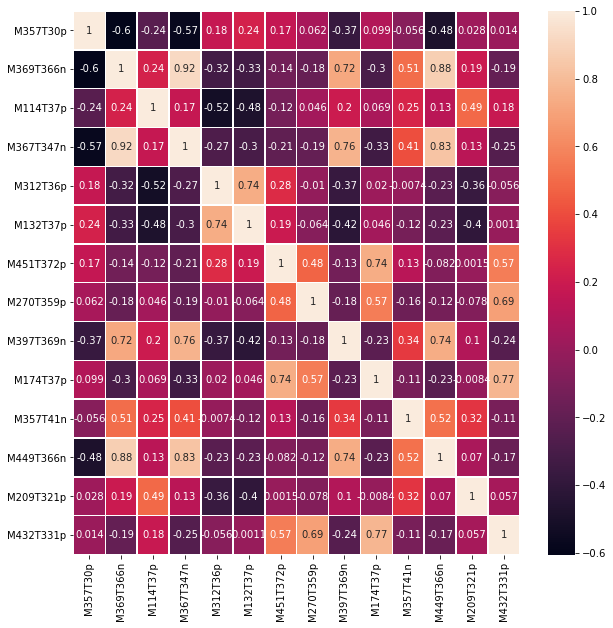

In [48]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))  
sn.heatmap(corrMatrix, annot=True,linewidths=.5, ax=ax)
plt.show();